# Линейная регрессия. Градиентный спуск

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

Пусть имеется обучающая выборка $\mathbb X=\{(x^1,y^1), \dots (x^j,y^j)\dots (x^N,y^N)\} $, $x^j=\{x_1,x_2,\dots x_d\}$ - вектор признаков $j$-ого объекта (всего $d$ признаков), $y^j$ - значение целевого признака (ответа), в задаче регрессии $y^j \in R$. Удобно представить обучающую выборку в виде  матрицы "объекты-признаки":
$$
X=\left(\matrix{x_1^1,x_2^1,\dots x_d^1 \\ x_1^2,x_2^2,\dots x_d^2\\ \dots \dots \\ x_1^N,x_2^N,\dots x_d^N}\right),
$$ в которой каждая строка содержит признаковое описание
одного из обучающих объектов ( $N$-число объектов). Таким образом, строки в этой матрице соответствуют
объектам, а столбцы - признакам.
Нашей задачей является построение функции a : $X \to Y$, которая для любого
объекта будет предсказывать ответ. Такая функция называется алгоритмом или моделью (hypothesis).
Линейная регрессионная модель сводится к сумме признаков объектов с некоторыми весами (параметры модели): 
$$
a(x)=w_0+w_1x_1+w_2x_2+\dots +w_dx_d=(\vec w,\vec x)
$$
Здесь $\vec w =\{w_0,w_1,w_2 \dots w_d \}$ - вектор весов, $\vec x =\{1,x_1,x_2 \dots x_d \}$ - вектор признаков с единичным признаком. 

Функционал качества в задачах обучения с учителем обычно задается в виде суммы по объектам выборки:
$$Q(a) = \frac 1 N \sum_{i=1}^N L(y_i, a(x_i)),$$
где $L(y, a)$ - функция потерь, задающая штраф за разницу между предсказанием и истинным значением целевого признака. 
Рассмотрим квадратичную функцию потерь 
$$
L(y,a)=(y-a)^2.
$$
Тогда задача обучения сводится к задаче оптимизации:
$$
Q(a,X)=\frac{1}{N}\sum_{j=1}^N \left(y^{(j)} -(\vec w,\vec x^j) \right)^2 \to \min,
$$
или в матричном виде 
$$
Q(a,X)=\frac{1}{N}\parallel Xw - y\parallel^2  \to \min,
$$
Эта задача может быть решена явно: 
$$w = (X^TX)^{-1}X^Ty.$$

Научимся запускать линейную регрессию из scikit-learn.

In [15]:
from sklearn.linear_model import LinearRegression

In [154]:
np.random.seed(17)
n_features = 2
n_objects = 300
w_true = np.array([1.0,1.0])
X = np.random.uniform(-5,5, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0,1, (n_objects))

Обучим линейную регрессию, выведем коэффициенты: 
$$
a(x)=w_0+w_1x_1+w_2x_2
$$

In [155]:
lr = LinearRegression()
lr.fit(X,Y)
print('Model: w_0=',lr.intercept_,'w_1=',lr.coef_[0],'w_2=',lr.coef_[1])

Model: w_0= 0.03495244495190963 w_1= 1.0103816892089745 w_2= 1.0262556356704529


Выведем $R^2$ - коэффициент детерминации, определяемый:
$$R^2 = 1 - \frac{\sum_i (y_i - a(x_i))^2}{\sum_i (y_i - \overline{y}_i)^2}$$

In [156]:
print(lr.score(X,Y))

0.932497833857799


Выведем предсказание модели:

In [157]:
lr.predict([[1, 2]])

array([3.09784541])

#### Ошибки

In [158]:
y_pred=lr.predict(X)

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as  mse


print(mae(y_pred,Y),mse(y_pred,Y))

0.8571392470074388 1.1606107010059759


## Градиентный спуск


Обращение матрицы $X^TX$  — очень трудоёмкая операция при большом количестве признаков. Параметры модели ищут итерационными методами, один из них — градиентный спуск.

Напомним, что в градиентном спуске значения параметров на следующем шаге получаются из значений параметров на текущем шаге смещением в сторону антиградиента функционала: 

$$w^{(k+1)} = w^{(k)} - \eta_k \nabla Q(w^{(k)}),$$
где $\eta_k$ — шаг градиентного спуска.

Формула градиента квадратичной функции ошибки выглядит следующим образом:

$$\nabla Q(w)  = \frac{2}{N}(X^TXw - X^Ty).$$
 

Напишем функцию градиентного спуска, зависящую от:
- X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w_0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - num_steps — число шагов; 
 и возращающую конечный вектор весов и значения функционала ошибки на каждом шаге.

In [164]:
def grad_descent(X, y, w_0,step_size, num_steps):
    w = w_0.copy()
    w_list=[]
    for i in range(num_steps):
        w_list.append(w)
        w =w- 2 * step_size * np.dot(X.T, np.dot(X, w) - y)/Y.shape[0]
    return w_list

In [165]:
num_steps = 20
step_size = 1e-2
w_0 = np.array([0,0])
w_list=grad_descent(X, Y, w_0,step_size, num_steps)
w_list = np.array(w_list)

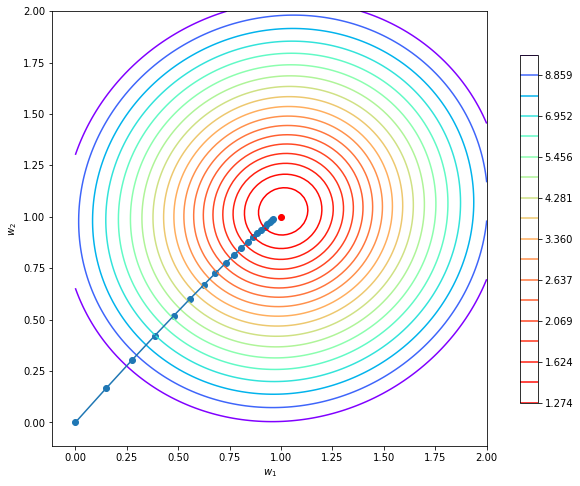

In [166]:
# compute level set
A, B = np.meshgrid(np.linspace(0, 2, 100), np.linspace(0, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))


plt.figure(figsize=(12, 8))
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

## Стандартизация признаков

In [176]:
X = np.random.normal(2,5, (n_objects, n_features))

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [178]:
print(len(X_train),len(X_test))

210 90


In [179]:
print(np.mean(X_train,axis=0))

[1.84264096 2.28585073]


In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [181]:
print(np.mean(X_train,axis=0))
print(np.std(X_train,axis=0))

[-5.07530526e-17  1.15780401e-16]
[1. 1.]


In [182]:
X_test = scaler.transform(X_test)

In [183]:
print(np.mean(X_test,axis=0))

[ 0.13324545 -0.16281793]


## Стохастический градиентный спуск

#### 1. Напишите функцию стохастического градиентного спуска. 
Функция использует для оценки градиента всего функционала ошибки значение градиента, вычисленного по подвыборке размера batch_size=10. Визуализируйте траекторию, длина шага $\eta=1$.

## Линейная регрессия на данных

In [148]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [184]:
X = data.data
y = data.target
N, d = X.shape
print( N, d)

506 13


Разбейте выборку на обучающую и тестовую в соотношении 7:3. Проведите стандартизацию признаков, постройте линейную регреcсию и ответьте на следующие вопросы. 
#### 1. Какова ошибка (коэффициент $R^2$) линейной регрессии на обучающей  выборке?

#### 2. Какова ошибка (коэффициент $R^2$) линейной регрессии на тестовой выборке?

#### 3. Постройте диаграмму важности признаков. 
Используйте plt.bar, отсортируйте признаки по важности (модуль соответствующего коэффициента в линейной регрессии) и постройте диаграмму.  Какой признак наиболее важный?